<a href="https://colab.research.google.com/github/joneswinslet/debit-card-fraud-detection/blob/main/Debit_card_fraud_detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [8]:
MA_Data = pd.read_csv('/Mastercard_stock_history.csv')

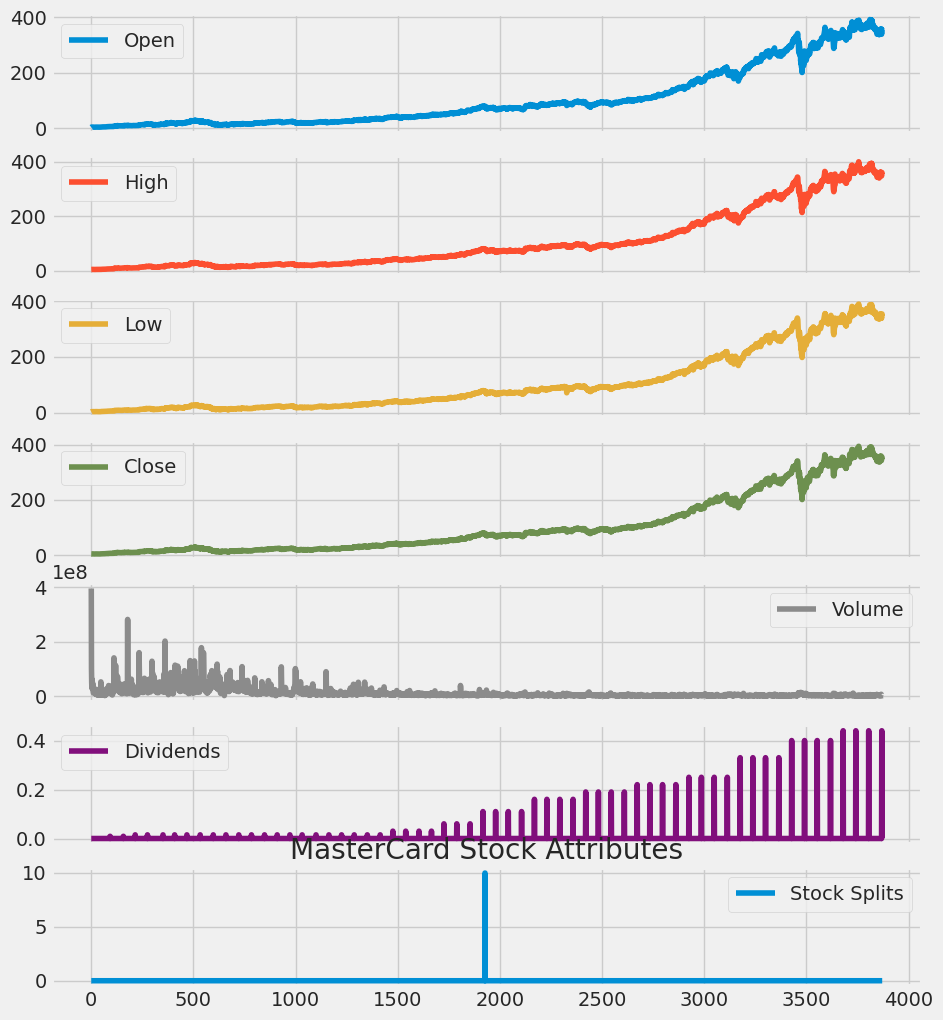

In [9]:
MA_Data.plot(subplots = True, figsize = (10,12))
plt.title('MasterCard Stock Attributes')
plt.show()

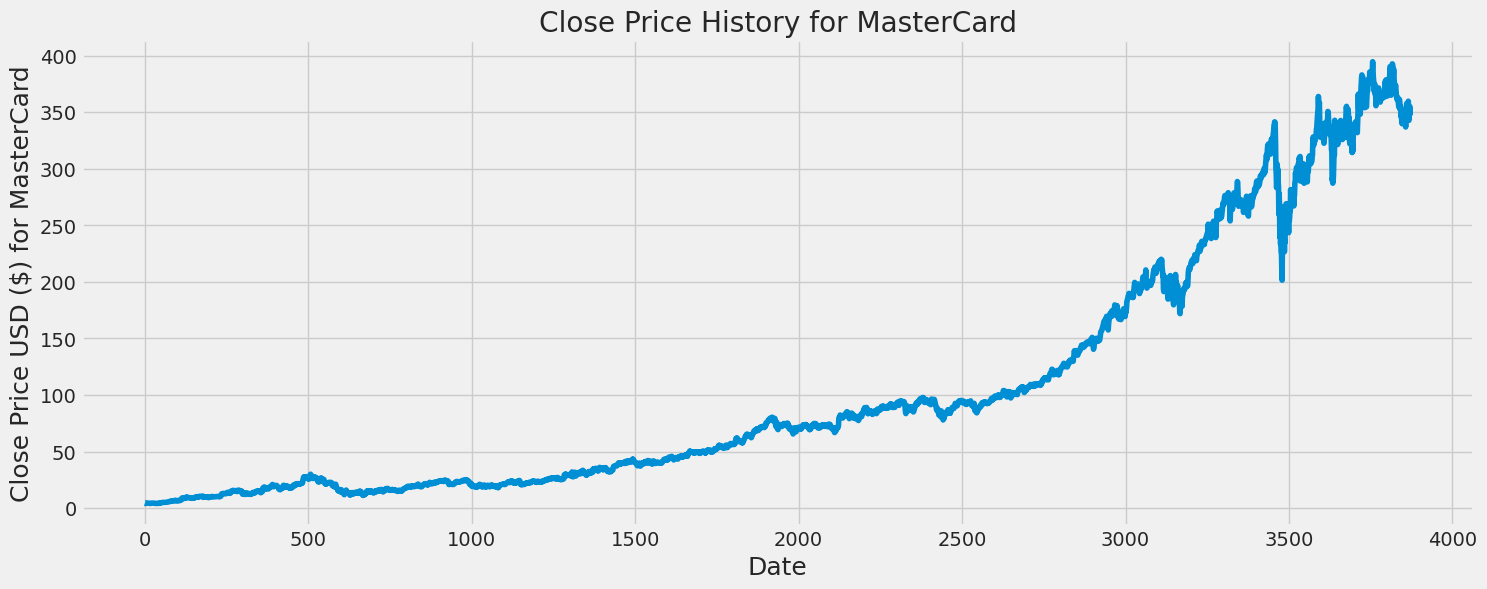

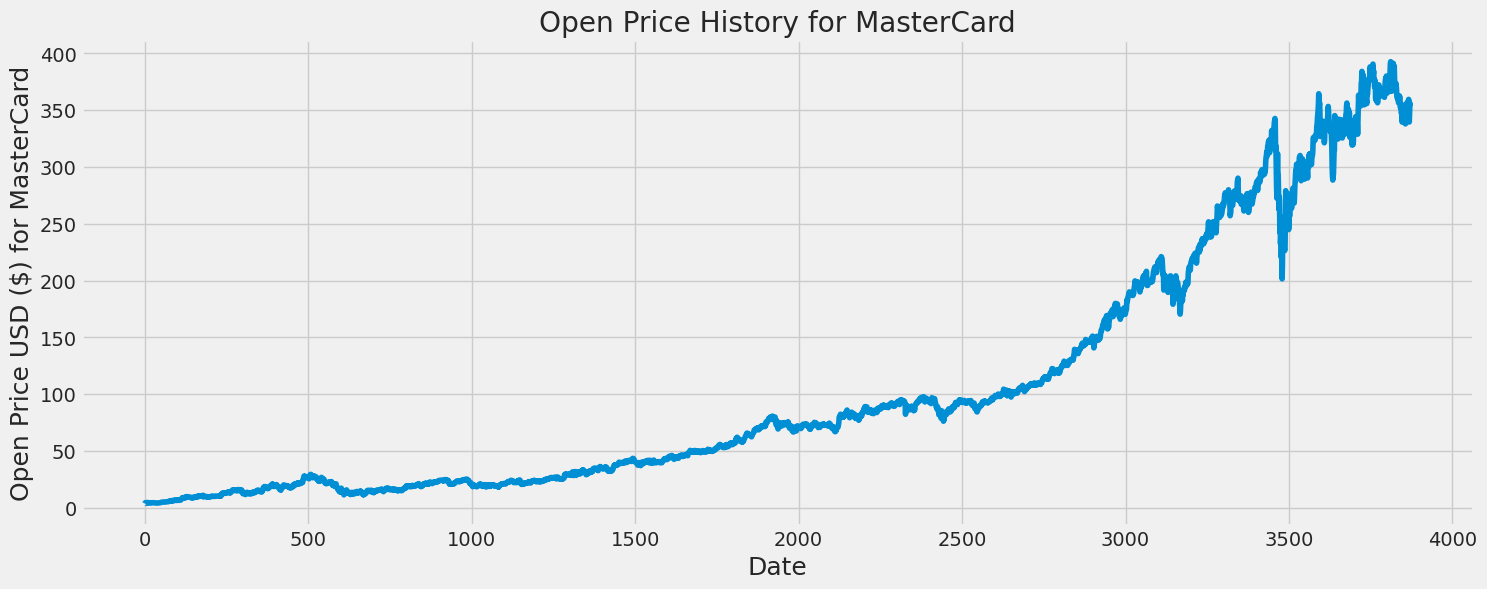

In [10]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

#Test the function
plot_close_val(MA_Data, 'Close', 'MasterCard')
plot_close_val(MA_Data, 'Open',  'MasterCard')

In [12]:
ma_info =  pd.read_csv('/Mastercard_stock_history.csv',
                         header=None,
                         names=(['Description','Information']))
#ma_info.dropna()
ma_info.drop(ma_info.loc[ma_info['Information']=='nan'].index, inplace=True)
ma = ma_info.sort_values('Information').style
ma

,,,,,,Description,Information
2014-02-03,72.46498438615183,72.80801446585315,70.36868864689448,70.42586517333984,9828200,0.0,0.0
2016-08-12,93.07581586079631,93.51229505633862,92.6393440653387,93.23101043701172,1988600,0.0,0.0
2016-08-15,93.41531488313737,93.65780091068167,93.182530368719,93.54141235351562,2081200,0.0,0.0
2016-08-16,93.30860219407592,93.36680386136486,92.5908457649142,92.74604034423828,2866200,0.0,0.0
2016-08-17,92.9109197795378,93.18250286621678,92.17376040134909,92.71692657470703,4054700,0.0,0.0
2016-08-18,92.4356444462271,92.98851210035103,92.21255412259504,92.40653991699219,3134200,0.0,0.0
2016-08-19,92.31927172489077,92.42596615864144,91.57241808872162,92.35807037353516,3090800,0.0,0.0
2016-08-22,92.32896196043154,93.06611399438579,92.09617009699735,92.91092681884766,2390800,0.0,0.0
2016-08-23,93.11461229895784,93.85177171834826,93.10491078815303,93.3958969116211,3099700,0.0,0.0
2016-08-24,93.39588890945319,93.57047908855823,92.52293801392807,92.65872955322266,2008100,0.0,0.0


<Axes: >

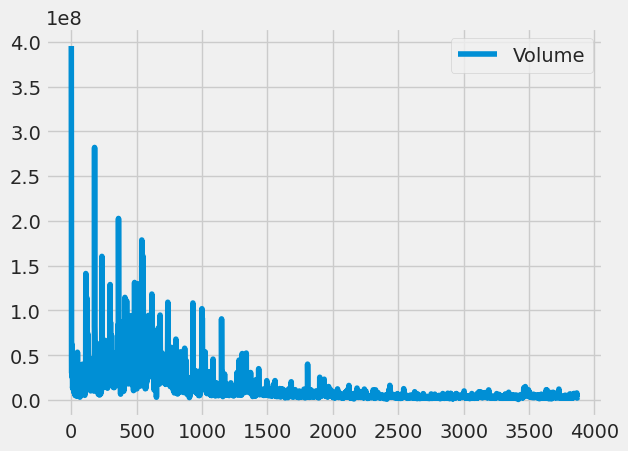

In [13]:
MA_Data[["Volume"]].plot()


In [14]:
MA_Data = pd.read_csv('/Mastercard_stock_history.csv', header=0,
                      index_col= 0, names=['Date','Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Splits'],
                      parse_dates=True)
# Get the number of days in `ma`
days = (MA_Data.index[-1] - MA_Data.index[0]).days

# Calculate the CAGR
cagr = ((((MA_Data['Close'][-1]) / MA_Data['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of Mastercard since IPO is " , round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of Mastercard since IPO is  33.26 % per year


In [15]:
adj_close_px = MA_Data['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2021-09-28    354.386739
2021-09-29    354.026943
2021-09-30    353.519334
2021-10-01    353.225706
2021-10-04    352.468413
2021-10-05    351.782529
2021-10-06    351.304383
2021-10-07    351.057624
2021-10-08    350.893543
2021-10-11    350.514987
Name: Close, dtype: float64

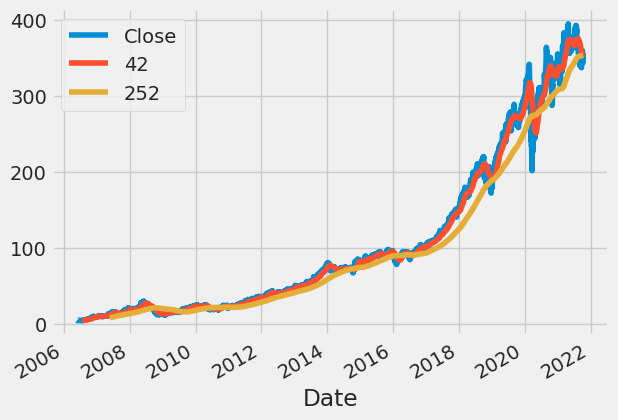

In [16]:
MA_Data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
MA_Data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
MA_Data[['Close', '42', '252']].plot()

plt.show()